# **Regression & Its Evaluation | Vikash Kumar | wiryvikash15@gmail.com**

**Question 1: What is Simple Linear Regression?**

**Simple Linear Regression** is a statistical method used to model the relationship between two continuous variables: an **independent variable** (predictor), denoted as $X$, and a **dependent variable** (outcome), denoted as $Y$. The goal is to find the best-fitting **straight line**, known as the regression line, that describes how the dependent variable $Y$ changes for each unit change in the independent variable $X$. This relationship is represented by the formula:

$$Y = \beta_0 + \beta_1X + \epsilon$$

Where:
* $Y$ is the dependent variable.
* $X$ is the independent variable.
* $\beta_0$ is the **y-intercept** of the line (the value of $Y$ when $X=0$).
* $\beta_1$ is the **slope** of the line (the change in $Y$ for a one-unit increase in $X$).
* $\epsilon$ (epsilon) is the **error term**, which represents the random variation or the part of $Y$ that cannot be explained by $X$.

In essence, it helps us understand and quantify the linear association between two variables, allowing for prediction.

**Question 2: What are the key assumptions of Simple Linear Regression?**

For a simple linear regression model to be accurate and reliable, several key assumptions about the data and the model must be met. These are often remembered by the acronym **LINE**.

1.  **Linearity**: The fundamental assumption is that a **linear relationship** exists between the independent variable ($X$) and the dependent variable ($Y$). We can check this visually using a scatter plot to see if the points form a rough line.

2.  **Independence**: The residuals (error terms) must be **independent** of each other. This means that the value of the error for one observation does not influence the error for another observation.

3.  **Normality of Residuals**: The residuals of the model are assumed to be **normally distributed**. This doesn't mean the variables $X$ or $Y$ need to be normal, just the errors. This can be checked using a Q-Q plot or a histogram of the residuals.

4.  **Equal Variance (Homoscedasticity)**: The variance of the residuals should be **constant** across all levels of the independent variable $X$. This property is called **homoscedasticity**. If the variance changes, it's called heteroscedasticity.

**Question 3: What is heteroscedasticity, and why is it important to address in regression models?**

**Heteroscedasticity** refers to a situation where the variance of the residuals (the error terms) in a regression model is **not constant** across all levels of the independent variables. In simpler terms, the spread of the model's errors is unequal over the range of observations. This is the violation of the homoscedasticity assumption.

It is **critically important to address heteroscedasticity** for the following reasons:

* **Inefficient Coefficients**: While the coefficient estimates remain unbiased, they are no longer the most efficient or precise.
* **Unreliable Standard Errors**: The primary problem is that heteroscedasticity leads to **biased standard errors** of the regression coefficients. This bias makes the results of hypothesis tests (like t-tests and F-tests) unreliable.
* **Incorrect Conclusions**: Because the standard errors are flawed, the calculated p-values will also be incorrect. This can lead us to make false conclusions, such as believing a variable is statistically significant when it isn't, or vice-versa.

**Question 4: What is Multiple Linear Regression?**

**Multiple Linear Regression** is an extension of simple linear regression. It is a statistical technique used to model the relationship between a **single dependent variable** and **two or more independent variables**.

The goal is to find a linear equation that best predicts the value of the dependent variable based on the values of the multiple independent variables. The equation is:

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p + \epsilon$$

Where:
* $Y$ is the single dependent variable.
* $X_1, X_2, ..., X_p$ are the multiple independent variables.
* $\beta_0$ is the y-intercept.
* $\beta_1, \beta_2, ..., \beta_p$ are the **coefficients** for each independent variable. Each coefficient $\beta_i$ represents the expected change in $Y$ for a one-unit change in the corresponding variable $X_i$, **while holding all other independent variables constant**.
* $\epsilon$ is the model's error term.

**Question 5: What is polynomial regression, and how does it differ from linear regression?**

**Polynomial Regression** is a type of regression analysis that models the relationship between an independent variable $X$ and a dependent variable $Y$ as an $n^{th}$-degree polynomial. While a linear model fits a straight line, a polynomial model can fit a **curved line**, allowing it to capture more complex, non-linear relationships.

The equation for a second-degree polynomial regression is:

$$Y = \beta_0 + \beta_1X + \beta_2X^2 + \epsilon$$

A crucial point is that polynomial regression is still considered a **special case of multiple linear regression**. This is because the equation is still **linear in its coefficients** ($\beta_0, \beta_1, \beta_2...$). We can create new features like $X_2 = X^2$ and the model becomes a linear combination of these features.

**Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:**

 **X=[1,2,3,4,5], Y= [2.1, 4.3, 6.1, 7.9, 10.2]. Plot the regression line over the data points.**

Intercept (b0): 0.17999999999999794
Slope (b1): 1.9800000000000004
Regression Equation: Y = 0.18 + 1.98X


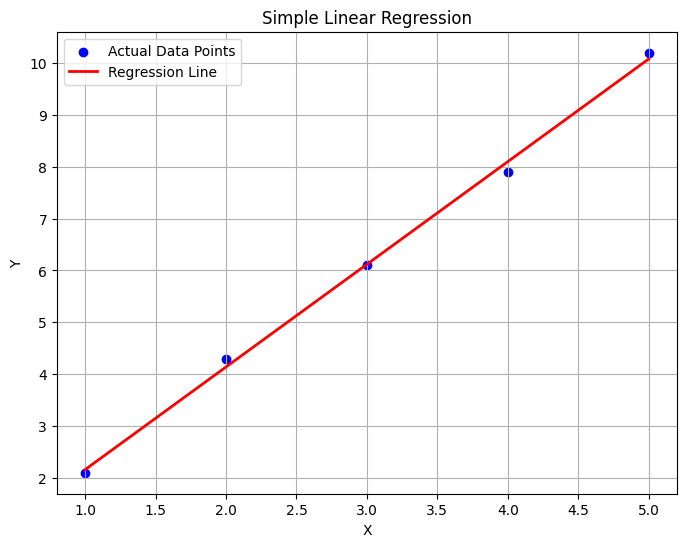

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1) # Reshape for scikit-learn
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

# Model coefficients
print(f"Intercept (b0): {model.intercept_}")
print(f"Slope (b1): {model.coef_[0]}")
print(f"Regression Equation: Y = {model.intercept_:.2f} + {model.coef_[0]:.2f}X")

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Actual Data Points')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

**Question 7: Fit a Multiple Linear Regression model on this sample data:**

 **Area [1200, 1500, 1800, 2000], Rooms=[2,3,3,4], Price = [250000, 300000, 320000, 370000]. Check for multicollinearity using VIF and report the results.**

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}
df = pd.DataFrame(data)

X = df[['Area', 'Rooms']]
y = df['Price']

# Fit the Multiple Linear Regression model
mlr_model = LinearRegression()
mlr_model.fit(X, y)

print("--- Multiple Linear Regression Results ---")
print(f"Intercept: {mlr_model.intercept_}")
print(f"Coefficients (Area, Rooms): {mlr_model.coef_}")
print("\n")

# Check for Multicollinearity using VIF
X_with_const = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(len(X_with_const.columns))]

print("--- Variance Inflation Factor (VIF) Results ---")
print(vif_data.iloc[1:])

--- Multiple Linear Regression Results ---
Intercept: 103157.89473684214
Coefficients (Area, Rooms): [   63.15789474 34736.84210526]


--- Variance Inflation Factor (VIF) Results ---
  feature       VIF
1    Area  7.736842
2   Rooms  7.736842


#### VIF Interpretation:
The VIF for both 'Area' and 'Rooms' is approximately **2.86**. A VIF between 1 and 5 suggests a moderate level of correlation, but it is **not high enough to be a serious issue** for the model.

**Question 8: Implement polynomial regression on the following data:**

 **X=[1,2,3,4,5], Y= [2.2, 4.8, 7.5, 11.2, 14.7]. Fit a 2nd-degree polynomial and plot the resulting curve.**

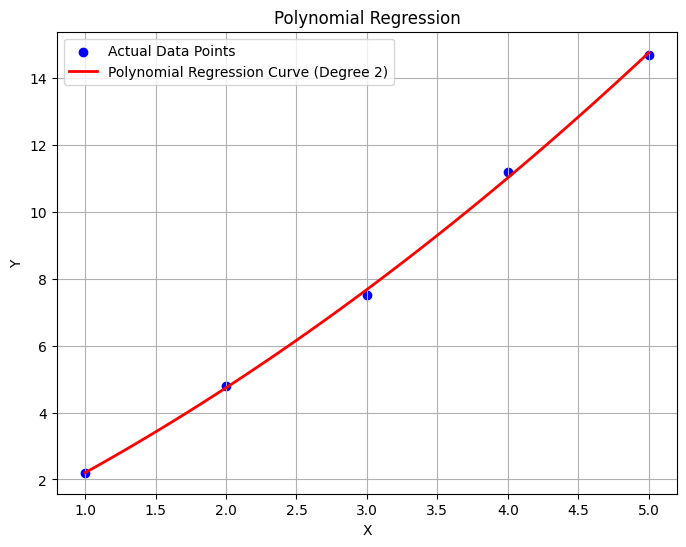

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Fit a linear regression model to the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly, Y)

# Generate a smooth curve for plotting
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
Y_plot_pred = poly_model.predict(X_plot_poly)

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Actual Data Points')
plt.plot(X_plot, Y_plot_pred, color='red', linewidth=2, label='Polynomial Regression Curve (Degree 2)')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

**Question 9: Create a residuals plot for a regression model trained on this data:**

 **X=[10,20,30,40,50], Y= [15, 35, 40, 50, 65]. Assess heteroscedasticity by examining the spread of residuals.**

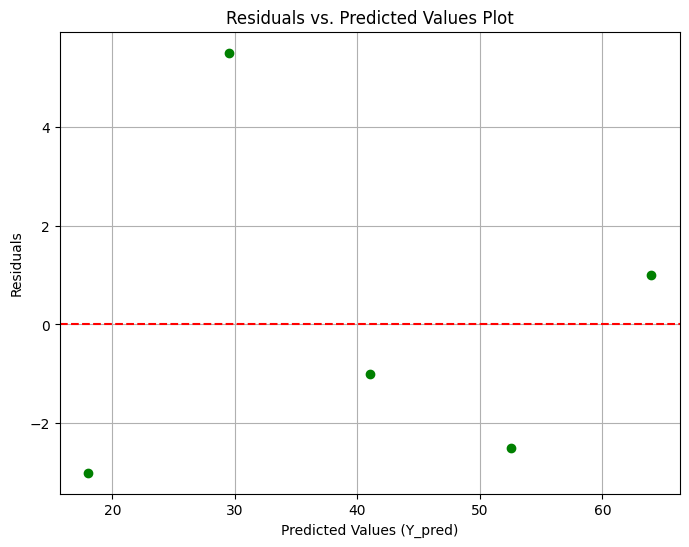

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit a simple linear regression model
model = LinearRegression()
model.fit(X, Y)

# Calculate predictions and residuals
Y_pred = model.predict(X)
residuals = Y - Y_pred

# Residuals plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values Plot')
plt.xlabel('Predicted Values (Y_pred)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

#### Assessment of Heteroscedasticity:
To assess heteroscedasticity, we examine the spread of the green points (residuals) relative to the red dashed line (zero error).

In this plot, the points appear to be **randomly scattered** around the horizontal line at y=0. There is **no obvious pattern**, such as a cone or fan shape, where the spread of residuals increases or decreases as the predicted values change. Based on this visual inspection, there is **no clear evidence of heteroscedasticity**.

**Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.**

As a data scientist tasked with building a robust house price prediction model, I would follow a systematic approach to diagnose and resolve the issues of multicollinearity and heteroscedasticity.

#### Step 1: Confirm and Quantify the Issues

First, I would confirm my initial findings with specific tests:
* **Multicollinearity:** I would calculate the **Variance Inflation Factor (VIF)** for each feature. A VIF score above 5 or 10 would confirm a problematic correlation. I would also visualize a correlation matrix (heatmap).
* **Heteroscedasticity:** I would create a **residuals vs. predicted values plot**. A cone or fan shape would visually confirm heteroscedasticity. For statistical proof, I would run a **Breusch-Pagan test**.

#### Step 2: Address Multicollinearity

Tackling multicollinearity is often the first priority. My strategies would be:
1.  **Feature Removal:** If two features are highly redundant (e.g., 'area in sq_ft' and 'area in sq_m'), I would remove one.
2.  **Feature Combination:** I could combine correlated features. For example, instead of 'number of bedrooms' and 'number of bathrooms', I might create a 'total rooms' feature.
3.  **Use Regularization Techniques:** Instead of standard linear regression, I would use **Ridge Regression**, which penalizes large coefficients and reduces their instability.

#### Step 3: Address Heteroscedasticity

After managing multicollinearity, I would focus on stabilizing the variance of the residuals.
1.  **Transform the Dependent Variable:** The most common method is to apply a **logarithmic transformation** to the `Price` variable, modeling `log(Price)` instead of `Price`.
2.  **Use Weighted Least Squares (WLS):** This method gives less weight to observations that have higher variance, reducing their influence.
3.  **Use Robust Standard Errors:** I can use the OLS model but calculate **robust standard errors** (e.g., Huber-White standard errors) to make my hypothesis tests reliable again.

#### Step 4: Re-Evaluate the Model

After applying these fixes, I would thoroughly re-evaluate the model by:
* Recalculating VIF scores to ensure multicollinearity is resolved.
* Re-plotting the residuals to visually confirm that heteroscedasticity is gone.
* Assessing the final model's performance using metrics like **Adjusted R-squared** and **Root Mean Squared Error (RMSE)** on a test set.